## Sentiment Analysis Part 3: Word2Vec

In [2]:
import pandas as pd
import gensim
#import logging
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
data_1 = pd.read_csv("data/clean_unlabeled.csv") 

In [4]:
data_1["review"] = data_1["review"].to_list()
data_1["review"] = data_1["review"].str.split(' ')

### Building the network using Word2Vec

In [5]:
model = gensim.models.Word2Vec(data_1['review'], min_count=1, workers=4)

In [6]:
model.build_vocab(data_1["review"], progress_per=10000)

In [7]:
model.train(data_1["review"], total_examples=model.corpus_count, epochs=30)

(263946166, 346905150)

In [8]:
# model = gensim.models.Word2Vec.load("word2vec.model")   # for loading a pretrained model

In [9]:
model.wv.most_similar("terrific")

[('fantastic', 0.8736887574195862),
 ('superb', 0.8651608228683472),
 ('great', 0.8526968359947205),
 ('brilliant', 0.8345992565155029),
 ('fine', 0.8287144303321838),
 ('wonderful', 0.8262192606925964),
 ('marvelous', 0.7974357604980469),
 ('fabulous', 0.7602247595787048),
 ('excellent', 0.7504191398620605),
 ('outstanding', 0.7284478545188904)]

In [10]:
model.wv.similarity("france", "queen")

0.28620747

In [11]:
model.save("word2vec.model")

### Visualizing the results

In [12]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [13]:
n = 20
# compare the word embeddings for "terrific", "horrible" and "positive" and the 20 most similar words for each of them
array = [model.wv.most_similar("terrific", topn=n)[i][0] for i in range(n)] + ["terrific"] + [model.wv.most_similar("horrible", topn=n)[i][0] for i in range(n)] + ["horrible"] + [model.wv.most_similar("positive", topn=n)[i][0] for i in range(n)] + ["positive"]
labels = [1 for i in range(n+1)] + [0 for i in range(n+1, 2*n+2)] + [2 for i in range(2*n+2, 3*n+3)]
nodes = np.array([model.wv.get_vector(i) for i in array])

In [14]:
tsne = TSNE(n_components=2, perplexity=5, init="pca", random_state=0).fit_transform(nodes)

Text(0.5, 1.0, 'IMDB Movie Review TSNE visualization')

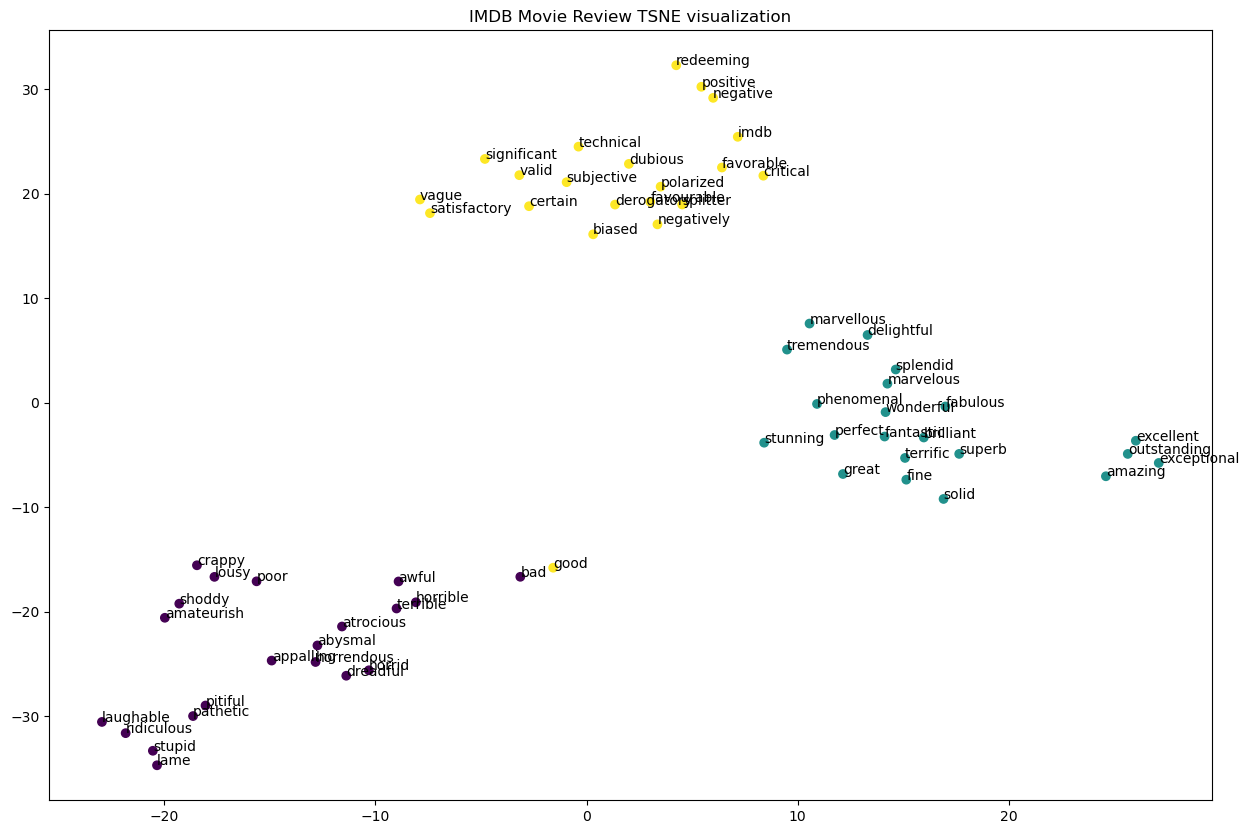

In [15]:
plt.figure(figsize=(15,10))
for i in range(len(array)):
    plt.annotate(array[i], xy=(tsne[i,0], tsne[i,1]), xytext=(tsne[i,0], tsne[i,1]))
plt.scatter(tsne[:,0], tsne[:,1], c=labels)
plt.title("IMDB Movie Review TSNE visualization")
#plt.savefig("TSNE_plot.svg")